In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn

In [ ]:
# config to show all features of the data
pl.Config.set_tbl_cols(25)

polars.config.Config

In [ ]:
github_url = "https://raw.githubusercontent.com/ArMonarch/Premier-League-Data-Analysis/refs/heads/master/England_CSV.csv"
# Load data from csv
df = pl.read_csv(github_url)

In [ ]:
# Select only needed features from the data. (unselceted data: Display Order)
selected_df = df.select(
    pl.col(
        ["Date", "Season", "HomeTeam", "AwayTeam", "Referee", "HTH Goals", "HTA Goals", "HT Result", "FTH Goals", "FTA Goals", "FT Result", "H Shots", "A Shots", "H SOT", "A SOT", "H Fouls", "A Fouls", "H Corners", "A Corners", "H Yellow", "A Yellow", "H Red", "A Red", "League"]
    )
)

# Take premier League Season data from 1993/94 to 2000/01 as later data has many missing features.
seasons = [f"{str(year)}/{str(year + 1)[2:]}" for year in range(1993, 2000)]
df_1993_2000 = selected_df.filter(
    pl.col("Season").is_in(seasons)
)

# Take premier League Season data from 2024/25 to 2000/01 as later data has many missing features.
seasons = [f"{str(year)}/{str(year + 1)[2:]}" for year in range(2000, 2025)]
df_2000_2024 = selected_df.filter(
    pl.col("Season").is_in(seasons)
)

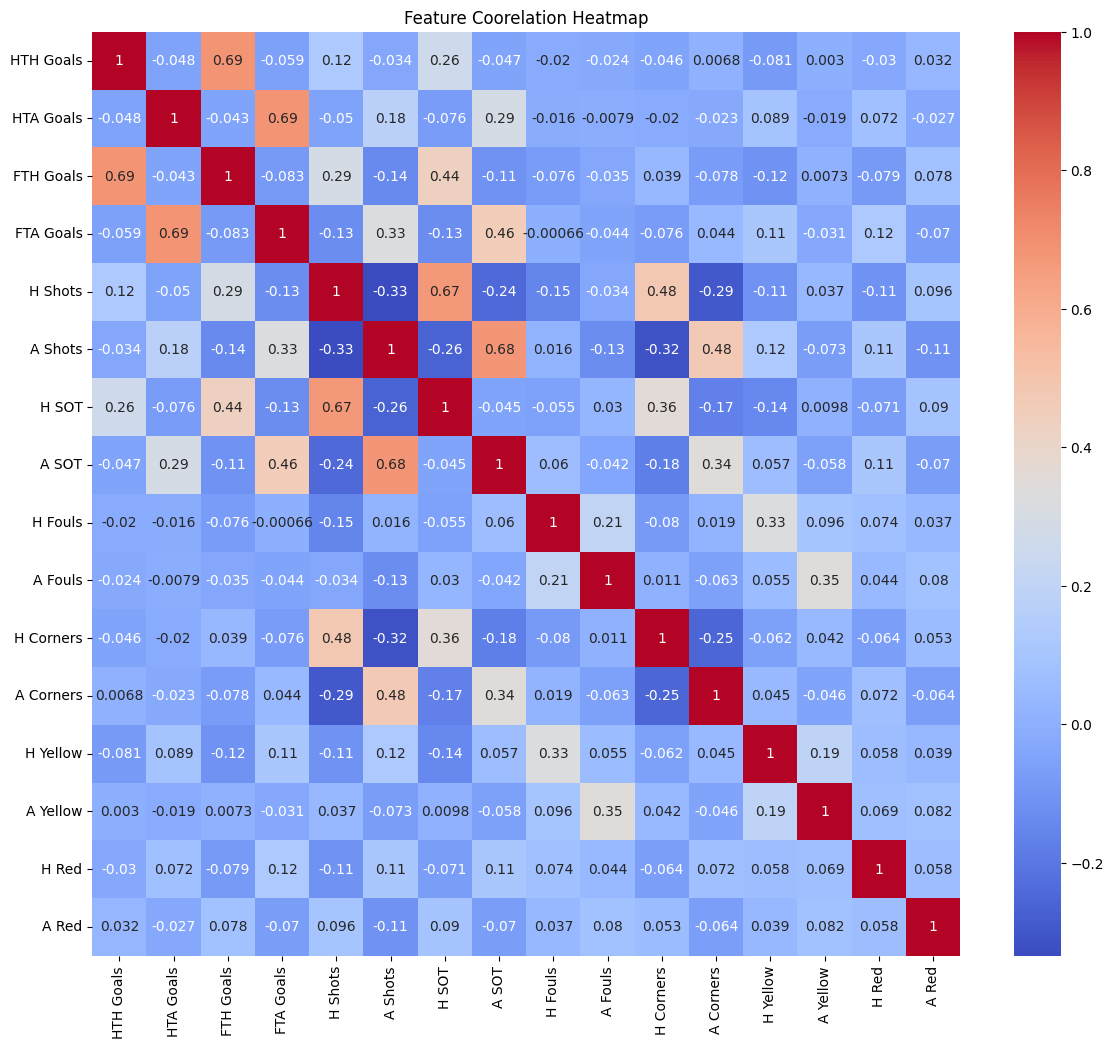

In [ ]:
# features needed for making an heatmap
heatmap_df = df_2000_2024.select(
    pl.col(["HTH Goals", "HTA Goals", "FTH Goals", "FTA Goals", "H Shots", "A Shots", "H SOT", "A SOT", "H Fouls", "A Fouls", "H Corners", "A Corners", "H Yellow", "A Yellow", "H Red", "A Red"])
)

#calculate the coorelation matrix
coorelation_matrix = heatmap_df.corr()

# Plot heatmap
plt.figure(figsize=(14,12))
seaborn.heatmap(coorelation_matrix, xticklabels=coorelation_matrix.columns, yticklabels=coorelation_matrix.columns, annot=True, cmap="coolwarm")
plt.title("Feature Coorelation Heatmap")
plt.show()

<ipython-input-63-1c2c7cd6e476>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


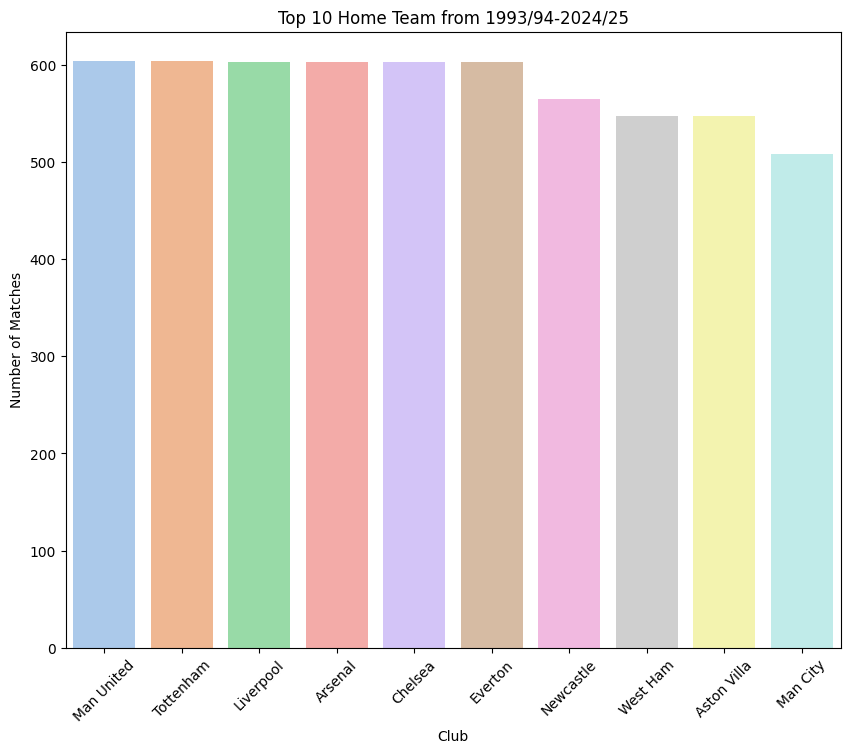

In [ ]:
# Plot Top Home Team from all available data
top_home_team = selected_df.get_column("HomeTeam").value_counts().sort("count", descending=True)
plt.figure(figsize=(10,8))
seaborn.barplot(
    x=top_home_team.head(10).get_column("HomeTeam"),
    y=top_home_team.head(10).get_column("count"),
    palette="pastel"
)
plt.xlabel("Club")
plt.ylabel("Number of Matches")
plt.title("Top 10 Home Team from 1993/94-2024/25")
plt.xticks(rotation=45)
plt.show()

<ipython-input-64-887216e5c4ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


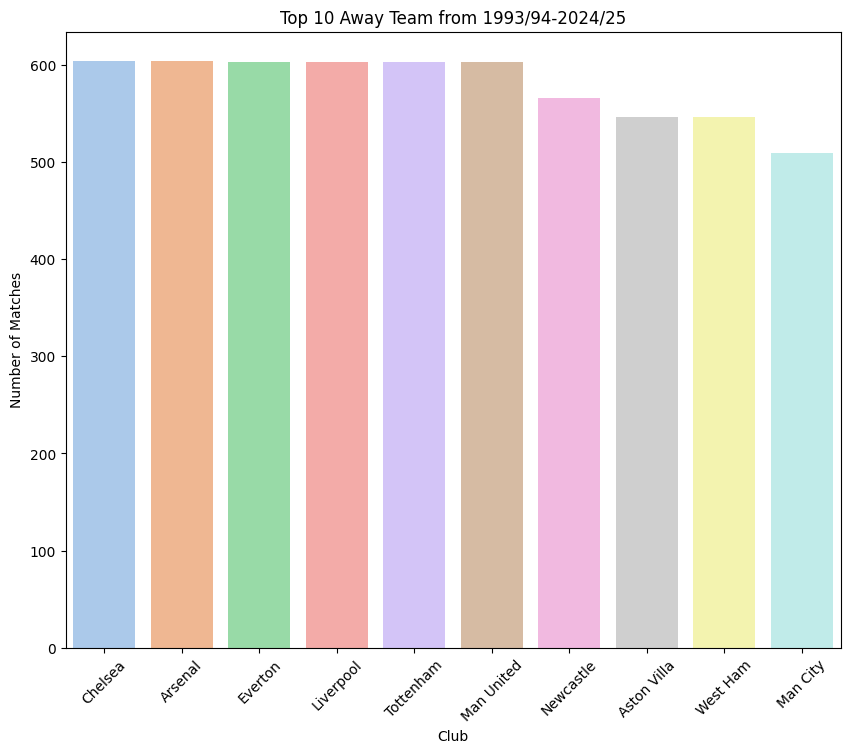

In [ ]:
# Plot Top Away Team from all available data
top_home_team = selected_df.get_column("AwayTeam").value_counts().sort("count", descending=True)
plt.figure(figsize=(10,8))
seaborn.barplot(
    x=top_home_team.head(10).get_column("AwayTeam"),
    y=top_home_team.head(10).get_column("count"),
    palette="pastel"
)
plt.xlabel("Club")
plt.ylabel("Number of Matches")
plt.title("Top 10 Away Team from 1993/94-2024/25")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Statistics of FTH & FTA goals
print("\nFTH Statistics:\n", selected_df.get_column("FTH Goals").describe())
print("\nFTA Statistics:\n", selected_df.get_column("FTA Goals").describe())


FTH Statistics:
 shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 12153.0  │
│ null_count ┆ 0.0      │
│ mean       ┆ 1.531309 │
│ std        ┆ 1.306927 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 2.0      │
│ max        ┆ 9.0      │
└────────────┴──────────┘

FTA Statistics:
 shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 12153.0  │
│ null_count ┆ 0.0      │
│ mean       ┆ 1.160948 │
│ std        ┆ 1.147714 │
│ min        ┆ 0.0      │
│ 25%        ┆ 0.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 2.0      │
│ max        ┆ 9.0      │
└────────────┴──────────┘


<ipython-input-66-09d84f0bc2e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


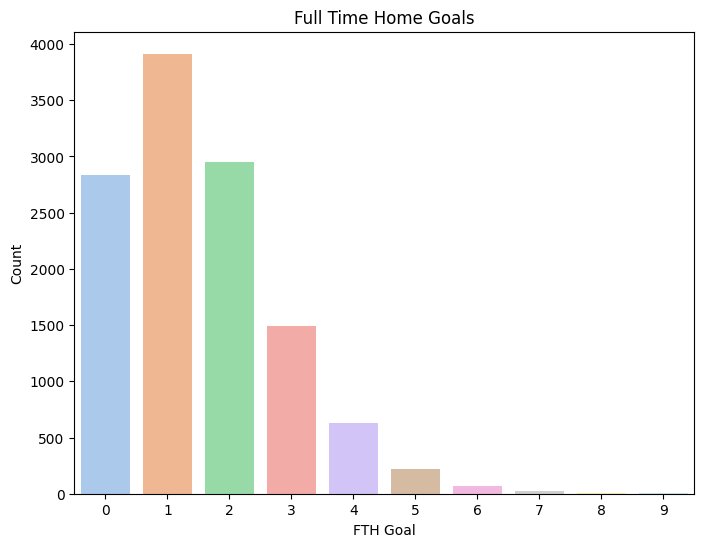

In [ ]:
# Plot Full Time Home Goals vs No of goals.
fulltime_home_goals = selected_df.get_column("FTH Goals").value_counts().sort("FTH Goals")
plt.figure(figsize=(8,6))
seaborn.barplot(
    x=fulltime_home_goals.get_column("FTH Goals"),
    y=fulltime_home_goals.get_column("count"),
    palette="pastel"
)
plt.xlabel("FTH Goal")
plt.ylabel("Count")
plt.title("Full Time Home Goals")
plt.show()

<ipython-input-67-66865347f3d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


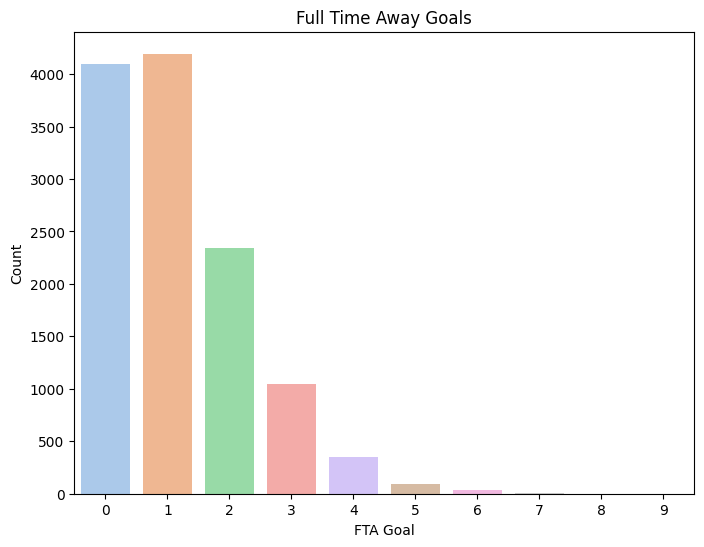

In [ ]:
# Plot Full Time Away Goals vs No of goals.
fulltime_away_goals = selected_df.get_column("FTA Goals").value_counts().sort("FTA Goals")
plt.figure(figsize=(8,6))
seaborn.barplot(
    x=fulltime_away_goals.get_column("FTA Goals"),
    y=fulltime_away_goals.get_column("count"),
    palette="pastel"

)
plt.xlabel("FTA Goal")
plt.ylabel("Count")
plt.title("Full Time Away Goals")
plt.show()

In [ ]:
# Identify Missing data
print("\nBefore Adding Missing Values\n",selected_df.null_count())

# Missing Datas:
# Referee,
#
# HTH Goals,
# HTA Goals,
# HT Result

# 1. For Referee, Replace null Referee with empty string
# 2. For HTH Goals, HTA Goals as both are unknown/ unrecorded set it to 0 as it will not affect the data.
# 3. HT Result can be set to Draw "D"
# 4. H Shots and A Shots are replacecd with 0 for unavailable data.
# other data are not used for anything in this file so set them ti high values.
replace_column_none_value = {
    "Referee": "",

    "HTH Goals": 0,
    "HTA Goals": 0,
    "HT Result": "D",

    "H Shots": 0,
    "A Shots": 0,

    "H SOT": 0,
    "A SOT": 0,

    "H Fouls": 0,
    "A Fouls": 0,

    "H Corners": 0,
    "A Corners": 0,

    "H Yellow": 100,
    "A Yellow": 100,

    "H Red": 100,
    "A Red": 100,
}
selected_df = selected_df.with_columns(
    [
        pl.col("Referee").fill_null("").alias("Referee"),
        pl.col("HTH Goals").fill_null(0).alias("HTH Goals")
    ]
)

selected_df = selected_df.with_columns(
    [pl.col(column).fill_null(default_value).alias(column) for (column, default_value) in replace_column_none_value.items()]
)

# Print the null count to check if any value are none after being filled for missing information.
print("\nAfter Adding Missing Values\n",selected_df.null_count())


Before Adding Missing Values
 shape: (1, 24)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ Dat ┆ Sea ┆ Hom ┆ Awa ┆ Ref ┆ HTH ┆ HTA ┆ HT  ┆ FTH ┆ FTA ┆ FT  ┆ H   ┆ A   ┆ H   ┆ A   ┆ H   ┆ A   ┆ H   ┆ A   ┆ H   ┆ A   ┆ H   ┆ A   ┆ Lea │
│ e   ┆ son ┆ eTe ┆ yTe ┆ ere ┆ Goa ┆ Goa ┆ Res ┆ Goa ┆ Goa ┆ Res ┆ Sho ┆ Sho ┆ SOT ┆ SOT ┆ Fou ┆ Fou ┆ Cor ┆ Cor ┆ Yel ┆ Yel ┆ Red ┆ Red ┆ gue │
│ --- ┆ --- ┆ am  ┆ am  ┆ e   ┆ ls  ┆ ls  ┆ ult ┆ ls  ┆ ls  ┆ ult ┆ ts  ┆ ts  ┆ --- ┆ --- ┆ ls  ┆ ls  ┆ ner ┆ ner ┆ low ┆ low ┆ --- ┆ --- ┆ --- │
│ u32 ┆ u32 ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ u32 ┆ u32 ┆ --- ┆ --- ┆ s   ┆ s   ┆ --- ┆ --- ┆ u32 ┆ u32 ┆ u32 │
│     ┆     ┆ u32 ┆ u32 ┆ u32 ┆ u32 ┆ u32 ┆ u32 ┆ u32 ┆ u32 ┆ u32 ┆ u32 ┆ u32 ┆     ┆     ┆ u32 ┆ u32 ┆ --- ┆ --- ┆ u32 ┆ u32 ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     

<ipython-input-69-780994612494>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


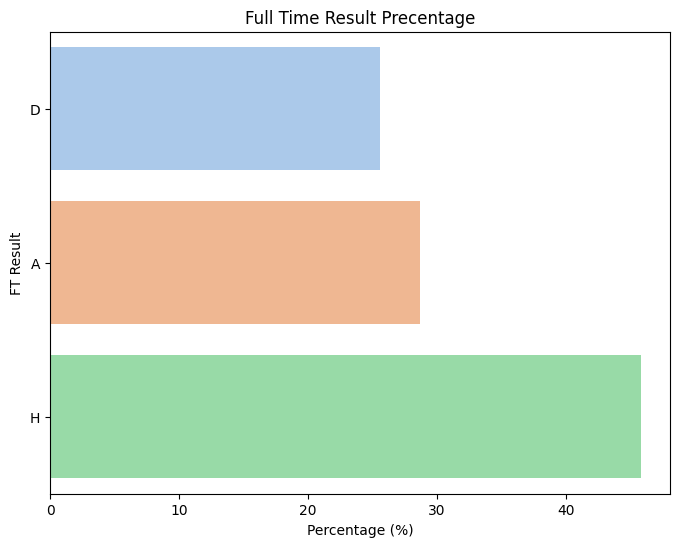

In [ ]:
# Plot Full Time Result Precentage
total_data = selected_df.get_column("FT Result").value_counts().get_column("count").sum()
plotting_data = selected_df.get_column("FT Result").value_counts().with_columns(
        (pl.col("count") * 100 / total_data).alias("Percentage")
)

plt.figure(figsize=(8,6))
seaborn.barplot(
    x=plotting_data.get_column("Percentage"),
    y=plotting_data.get_column("FT Result"),
    orient="h",
    palette="pastel"
)
plt.title("Full Time Result Precentage")
plt.xlabel("Percentage (%)")
plt.ylabel("FT Result")
plt.show()

In [ ]:
print("\nFT Result Percentage\n", plotting_data)


FT Result Percentage
 shape: (3, 3)
┌───────────┬───────┬────────────┐
│ FT Result ┆ count ┆ Percentage │
│ ---       ┆ ---   ┆ ---        │
│ str       ┆ u32   ┆ f64        │
╞═══════════╪═══════╪════════════╡
│ D         ┆ 3108  ┆ 25.573932  │
│ A         ┆ 3482  ┆ 28.651362  │
│ H         ┆ 5563  ┆ 45.774706  │
└───────────┴───────┴────────────┘


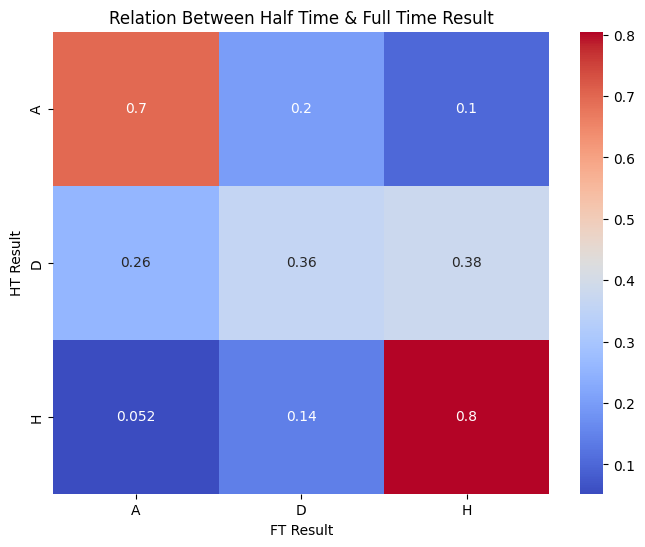

In [ ]:
# Plot Heatmap of Relation Between HT Result and FT Result.
# |-----------------------------------|
# |          |            |           |
# |          |            |           |
# |          |            |           |
# |          |            |           |
# |-----------------------------------|
# |          |            |           |
# |          |            |           |
# |          |            |           |
# |          |            |           |
# |-----------------------------------|
# |          |            |           |
# |          |            |           |
# |          |            |           |
# |          |            |           |
# |          |            |           |
# |-----------------------------------|

ht_ft_result = selected_df.select(pl.col(["HT Result", "FT Result"]))
import pandas as pd
plt.figure(figsize=(8,6))
seaborn.heatmap(
    pd.crosstab(
        ht_ft_result.get_column("HT Result"),
        ht_ft_result.get_column("FT Result"),
        normalize="index"
    ),
    annot=True,
    cmap="coolwarm"
)
plt.title("Relation Between Half Time & Full Time Result")
plt.xlabel("FT Result")
plt.ylabel("HT Result")
plt.show()

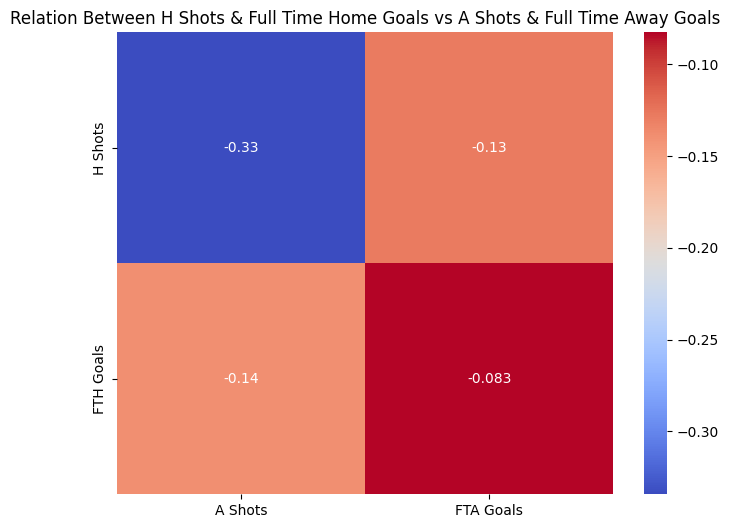

In [ ]:
# Shot vs Goals for Home & Away Team
# Selce data from 2000 - 2024 as previous data are missong and we filled them with 0. Which affect the map when drawn with full data
h_s_gd_df = df_2000_2024.select(
    pl.col(["H Shots", "FTH Goals", "A Shots", "FTA Goals"])
).corr()

hmap_df = h_s_gd_df.select(["A Shots", "FTA Goals"])

plt.figure(figsize=(8,6))
seaborn.heatmap(
    hmap_df[0:2],
    xticklabels=["A Shots", "FTA Goals"],
    yticklabels=["H Shots", "FTH Goals"],
    annot=True,
    cmap="coolwarm"
)
plt.title("Relation Between H Shots & Full Time Home Goals vs A Shots & Full Time Away Goals")
plt.show()

In [ ]:
# Needed Data Description
# Do not Concecrn with this
# used for checkinf each df summary while making report

print(fulltime_home_goals)
print(selected_df.get_column("FTH Goals").describe())
print(fulltime_away_goals)
print(selected_df.get_column("FTA Goals").describe())

shape: (10, 2)
┌───────────┬───────┐
│ FTH Goals ┆ count │
│ ---       ┆ ---   │
│ i64       ┆ u32   │
╞═══════════╪═══════╡
│ 0         ┆ 2834  │
│ 1         ┆ 3914  │
│ 2         ┆ 2954  │
│ 3         ┆ 1496  │
│ 4         ┆ 633   │
│ 5         ┆ 217   │
│ 6         ┆ 67    │
│ 7         ┆ 27    │
│ 8         ┆ 7     │
│ 9         ┆ 4     │
└───────────┴───────┘
shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 12153.0  │
│ null_count ┆ 0.0      │
│ mean       ┆ 1.531309 │
│ std        ┆ 1.306927 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 2.0      │
│ max        ┆ 9.0      │
└────────────┴──────────┘
shape: (10, 2)
┌───────────┬───────┐
│ FTA Goals ┆ count │
│ ---       ┆ ---   │
│ i64       ┆ u32   │
╞═══════════╪═══════╡
│ 0         ┆ 4093  │
│ 1         ┆ 4194  │
│ 2         ┆ 2344  │
│ 3         ┆ 1043  │
│ 4         ┆ 34